### Mardianto Tandi Ramma

### 2109106109

### posttest_KB_6

###### import library

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score

In [68]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#### supervised learning

In [69]:
X = df[['age', 'sex']] 
y = df['exang'] 

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
svc = SVC()

In [72]:
svc.fit(X_train, y_train)

SVC()

In [73]:
y_pred_svc = svc.predict(X_test)

In [74]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

In [75]:
class_report_svc = classification_report(y_test, y_pred_svc)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [76]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

Text(0.5, 1.0, 'Confusion Matrix (SVC)')

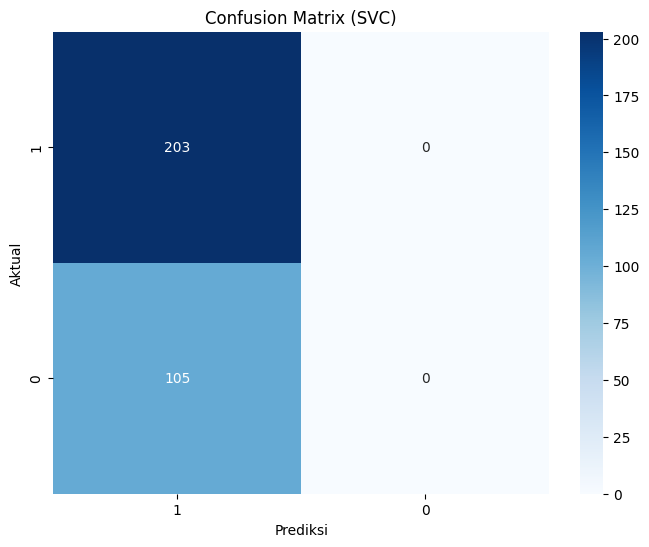

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '0'], yticklabels=['1', '0'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (SVC)')

In [78]:
class_report_svc = classification_report(y_test, y_pred_svc)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

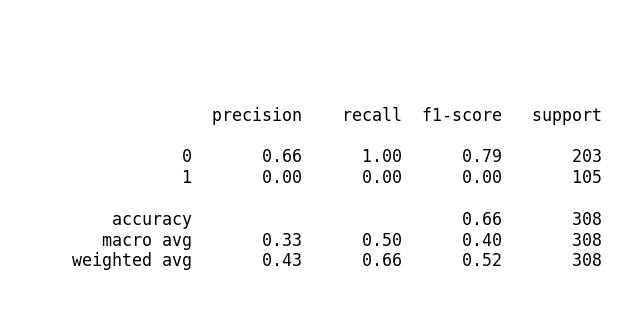

In [79]:
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, class_report_svc, {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')

plt.show()

In [80]:
# Membuat kamus yang memetakan label ke warna
color_map = {'1': 'r', '0': 'g'}

# Membuat daftar warna yang sesuai dengan label prediksi (y_pred_svc) dan label aktual (y_test)
y_pred_colors = [color_map[str(label)] for label in y_pred_svc]
y_test_colors = [color_map[str(label)] for label in y_test]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_29164\1840202941.py:22: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.scatter(X_test[y_test == '1']['age'], X_test[y_test == '1']['sex'], c='b', marker='^', label='Target 1')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29164\1840202941.py:22: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.scatter(X_test[y_test == '1']['age'], X_test[y_test == '1']['sex'], c='b', marker='^', label='Target 1')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29164\1840202941.py:25: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
 

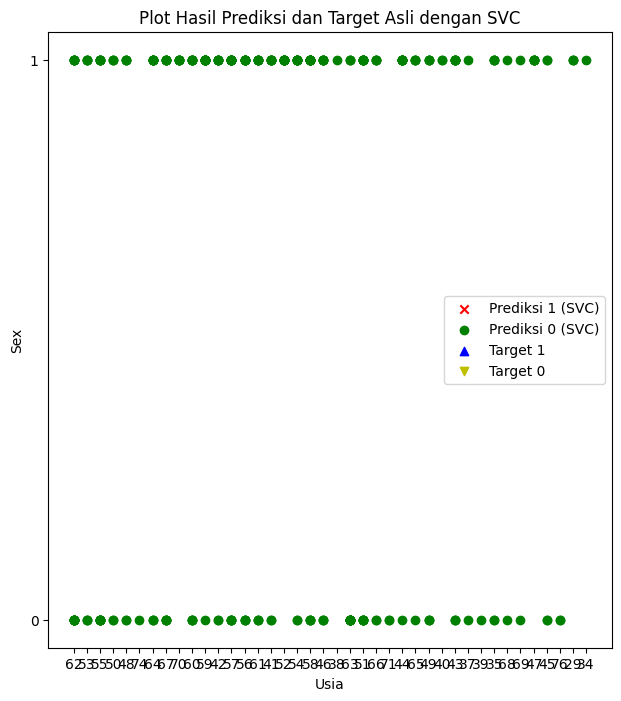

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

# Mengubah tipe data kolom 'age' dan 'sex' ke string untuk membandingkan dengan label '1' dan '0'
X_test['age'] = X_test['age'].astype(str)
X_test['sex'] = X_test['sex'].astype(str)

# Konversi y_pred_svc ke tipe data string
y_pred_svc = y_pred_svc.astype(str)

# Titik-titik hasil prediksi SVC dengan warna berbeda (hijau untuk benar, merah untuk salah)
# Prediksi 1 (SVC)
plt.scatter(X_test[y_pred_svc == '1']['age'], X_test[y_pred_svc == '1']['sex'], c='r', marker='x', label='Prediksi 1 (SVC)')

# Prediksi 0 (SVC)
plt.scatter(X_test[y_pred_svc == '0']['age'], X_test[y_pred_svc == '0']['sex'], c='g', marker='o', label='Prediksi 0 (SVC)')

# Titik-titik target asli dengan warna berbeda (biru untuk 1, kuning untuk 0)
# Target 1
plt.scatter(X_test[y_test == '1']['age'], X_test[y_test == '1']['sex'], c='b', marker='^', label='Target 1')

# Target 0
plt.scatter(X_test[y_test == '0']['age'], X_test[y_test == '0']['sex'], c='y', marker='v', label='Target 0')

plt.xlabel('Usia')
plt.ylabel('Sex')
plt.title('Plot Hasil Prediksi dan Target Asli dengan SVC')
plt.legend(loc='best')
plt.show()


#### Implementasi Metode K-Nearest Neighbors (KNN)

In [82]:
knn = KNeighborsClassifier(n_neighbors=3)

In [83]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_pred_knn = knn.predict(X_test)

In [85]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

In [86]:
class_report_knn = classification_report(y_test, y_pred_knn)

In [87]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

Text(0.5, 1.0, 'Confusion Matrix (KNN)')

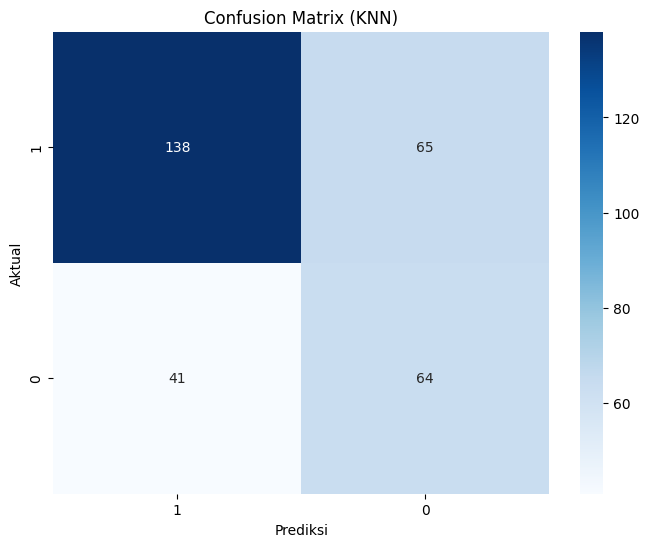

In [88]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '0'], yticklabels=['1', '0'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (KNN)')

In [89]:
class_report_knn = classification_report(y_test, y_pred_knn)

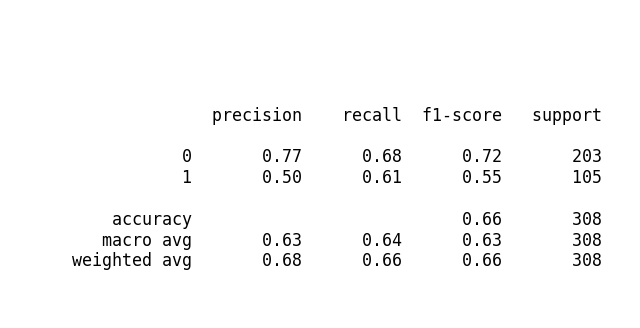

In [90]:
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, class_report_knn, {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')

plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29164\1541280031.py:22: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.scatter(X_test[y_test == '1']['age'], X_test[y_test == '1']['sex'], c='b', marker='^', label='Target 1')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29164\1541280031.py:22: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.scatter(X_test[y_test == '1']['age'], X_test[y_test == '1']['sex'], c='b', marker='^', label='Target 1')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29164\1541280031.py:25: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
 

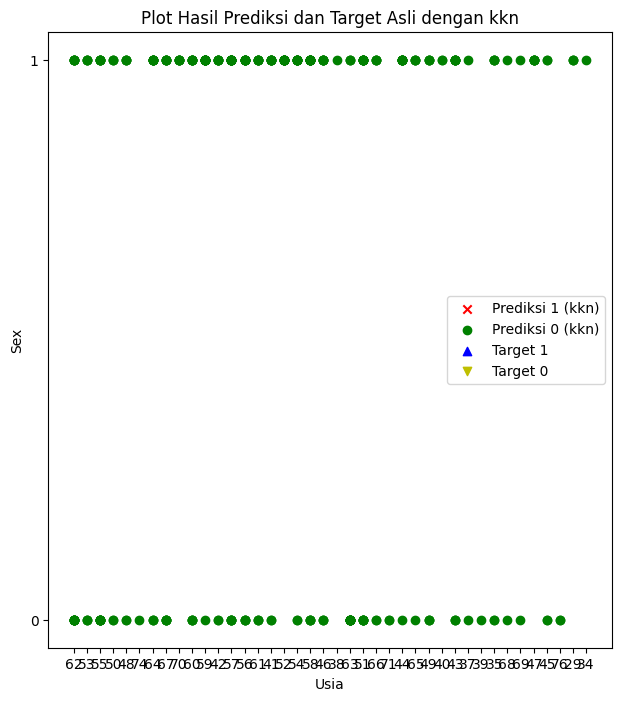

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

# Mengubah tipe data kolom 'age' dan 'sex' ke string untuk membandingkan dengan label '1' dan '0'
X_test['age'] = X_test['age'].astype(str)
X_test['sex'] = X_test['sex'].astype(str)

# Konversi y_pred_kkn ke tipe data string
y_pred_kkn = y_pred_svc.astype(str)

# Titik-titik hasil prediksi kkn dengan warna berbeda (hijau untuk benar, merah untuk salah)
# Prediksi 1 (kkn)
plt.scatter(X_test[y_pred_kkn == '1']['age'], X_test[y_pred_kkn == '1']['sex'], c='r', marker='x', label='Prediksi 1 (kkn)')

# Prediksi 0 (kkn)
plt.scatter(X_test[y_pred_kkn == '0']['age'], X_test[y_pred_kkn == '0']['sex'], c='g', marker='o', label='Prediksi 0 (kkn)')

# Titik-titik target asli dengan warna berbeda (biru untuk 1, kuning untuk 0)
# Target 1
plt.scatter(X_test[y_test == '1']['age'], X_test[y_test == '1']['sex'], c='b', marker='^', label='Target 1')

# Target 0
plt.scatter(X_test[y_test == '0']['age'], X_test[y_test == '0']['sex'], c='y', marker='v', label='Target 0')

plt.xlabel('Usia')
plt.ylabel('Sex')
plt.title('Plot Hasil Prediksi dan Target Asli dengan kkn')
plt.legend(loc='best')
plt.show()


#### Linear Regression

In [92]:
X = df[['cp','sex']]

In [93]:
y = df['age'] 

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred = model.predict(X_test)

In [97]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)  
r2 = r2_score(y_test, y_pred)

In [98]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2-Score:", r2)

MAE: 7.0651559133167146
MSE: 73.8281355341815
RMSE: 8.592330041041341
R2-Score: 0.019822808987507545


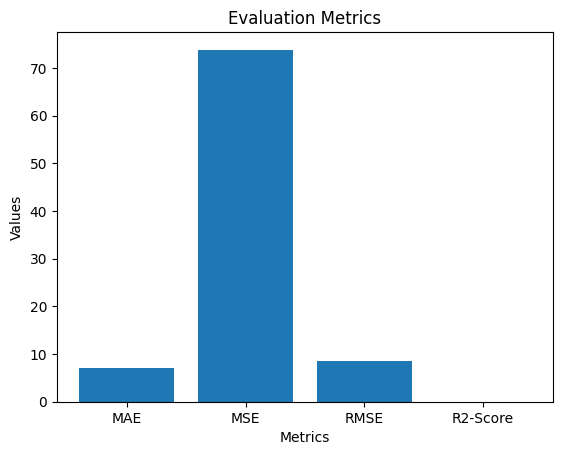

In [99]:
metrics = ["MAE", "MSE", "RMSE", "R2-Score"]
values = [mae, mse, rmse, r2]

plt.bar(metrics, values)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Evaluation Metrics")
plt.show()

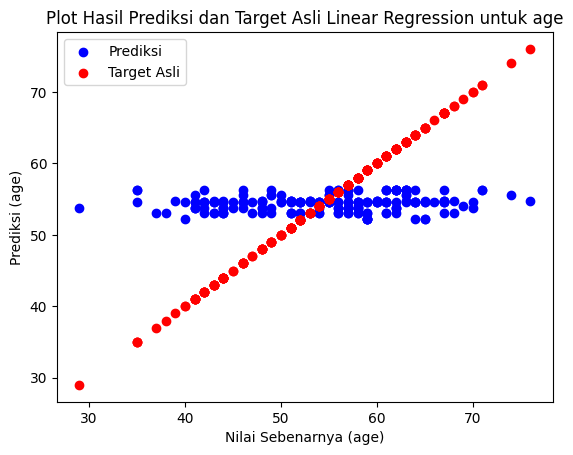

In [100]:
plt.scatter(y_test, y_pred, c='blue', label='Prediksi')
plt.scatter(y_test, y_test, c='red', label='Target Asli')
plt.xlabel("Nilai Sebenarnya (age)")
plt.ylabel("Prediksi (age)")
plt.title("Plot Hasil Prediksi dan Target Asli Linear Regression untuk age")
plt.legend()
plt.show()

#### Unsupervised Learning

In [101]:
X = df.iloc[:, [0, 4]].values 

In [102]:
wcss = []  


In [103]:
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

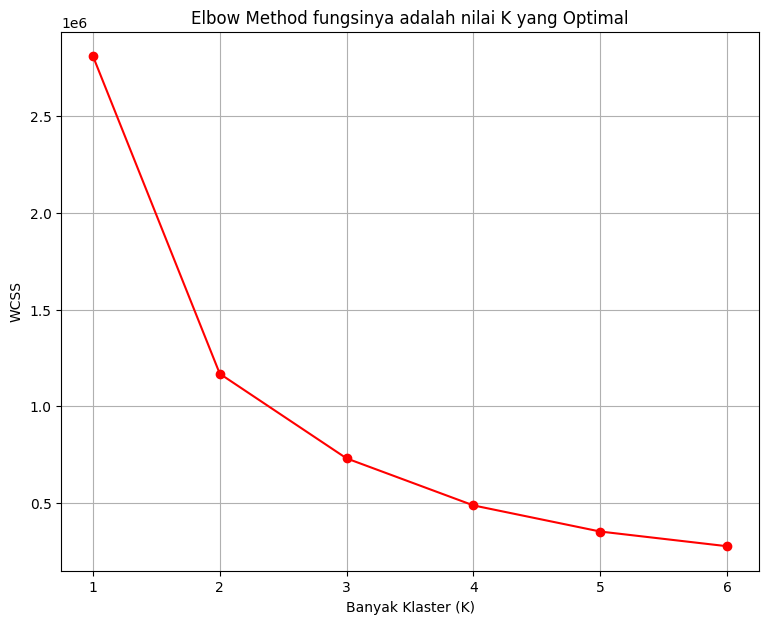

In [104]:
plt.figure(figsize=(9, 7))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='r')
plt.title('Elbow Method fungsinya adalah nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [105]:
k = 4 
kmeans = KMeans(k, n_init=10)

In [106]:
X = df[["age", "cp"]]

In [107]:

kmeans.fit(X)

KMeans(n_clusters=4, n_init=10)

In [108]:
predicted_clusters = kmeans.predict(X)

In [109]:
df["cluster"] = predicted_clusters

#### Evaluasi Cluster yang telah diprediksi

In [110]:
ss_score = silhouette_score(X, predicted_clusters)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, predicted_clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, predicted_clusters)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.51
Davies-Bouldin Index: 0.59
Calinski-Harabasz Index: 2989.70


In [111]:
true_labels = df['target']

In [112]:
cross_tab = pd.crosstab(predicted_clusters, true_labels)
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
target    0    1
row_0           
0        90  150
1       109   95
2        68  168
3       232  113 



In [113]:
ari = adjusted_rand_score(true_labels, predicted_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.05


In [114]:
nmi_age = normalized_mutual_info_score(df['age'], predicted_clusters)
nmi_educational_num = normalized_mutual_info_score(df['cp'], predicted_clusters)

print(f"Normalized Mutual Information (NMI) for Age: {nmi_age:.2f}")
print(f"Normalized Mutual Information (NMI) for Educational Num: {nmi_educational_num:.2f}")

Normalized Mutual Information (NMI) for Age: 0.56
Normalized Mutual Information (NMI) for Educational Num: 0.03


In [115]:
from sklearn.metrics import v_measure_score


homogeneity = homogeneity_score(true_labels, predicted_clusters)
completeness = completeness_score(true_labels, predicted_clusters)
v_measure = v_measure_score(true_labels, predicted_clusters)

print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.07
Completeness Score: 0.04
V-Measure Score: 0.05


C:\Users\ASUS\AppData\Local\Temp\ipykernel_29164\2433654517.py:5: UserWarning: 
The palette list has fewer values (3) than needed (152) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x="age", y="cp", palette=colors,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29164\2433654517.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x="age", y="cp", palette=colors,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29164\2433654517.py:14: UserWarning: 
The palette list has fewer values (3) than needed (152) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=cluster_centers, x=cluster_centers["age"], y=cluster_centers["cp"],


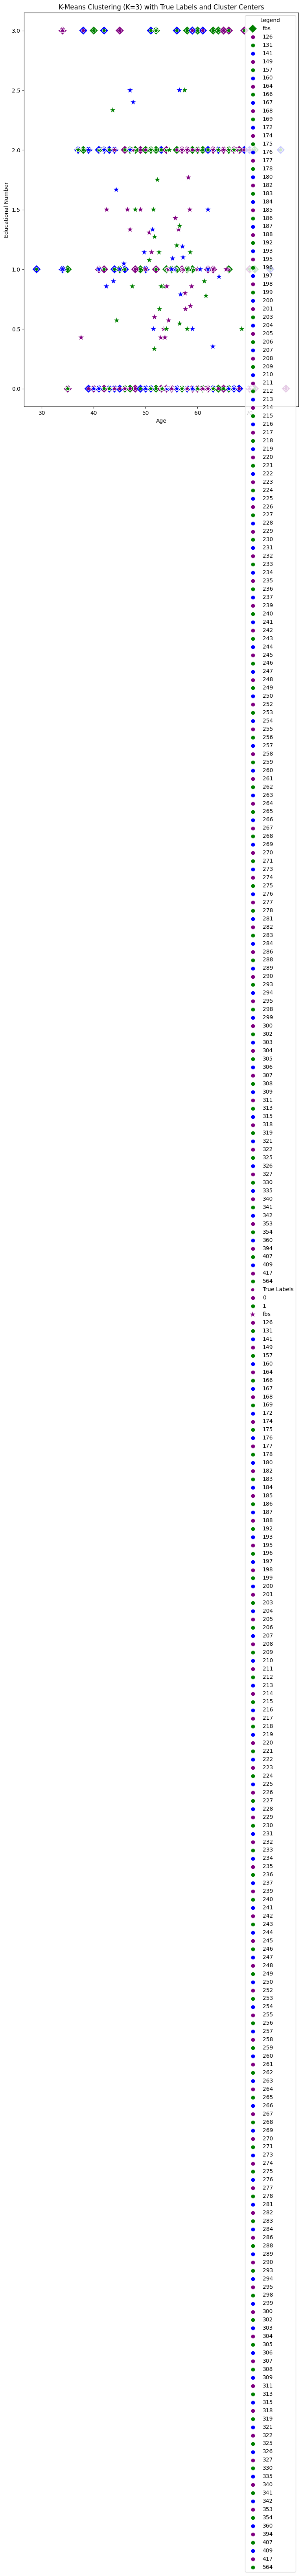

In [116]:
plt.figure(figsize=(9, 13))
colors = ["purple", "green", "blue"]

# Scatter plot hasil prediksi clustering
sns.scatterplot(data=df, x="age", y="cp", palette=colors,
                hue="chol", marker="D", s=130, label="fbs")

# Scatter plot target asli
sns.scatterplot(data=df, x="age", y="cp", palette=colors,
                hue="target", marker="o", s=40, label="True Labels")

# Tambahkan titik pusat cluster
cluster_centers = df.groupby("chol").mean()
sns.scatterplot(data=cluster_centers, x=cluster_centers["age"], y=cluster_centers["cp"],
                palette=colors, hue=cluster_centers.index, marker="*", s=200, label="fbs")

plt.title("K-Means Clustering (K=3) with True Labels and Cluster Centers")
plt.xlabel("Age")
plt.ylabel("Educational Number")
plt.legend(title="Legend", loc="upper right")
plt.show()